# LSE Machine Learning: Practical Applications

## Module 4 Unit 1 IDE Activity (Practice) | Execute variable selection on a data set in R

### In this notebook, variable selection is executed in R. In this example, the credit card data set is used. The aim of variable selection is to determine which variables are the most significant variables to use when predicting the balance of a customer's credit card using a variety of predictor variables.

### Step 1: Load and install the relevant packages

In this notebook, the `ILSR` package is used to load the relevant data set, the `dplyr` package for data manipulation, and the `leaps` package for variable selection.

In [2]:
library(ISLR)
library(leaps)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Step 2: Load and prepare the data

Following the loading and installation of the packages, the data set can now be loaded into R. For this example, the credit card data set contained in the ISLR package is used. Review the summary and the first couple of rows of the data set in order to gain insights into the amount of data manipulation that would be required before further use.

In [3]:
# Load the data
credit <- Credit

# Review summary of the data set
str(credit)

# Display the head of the data set
head(credit)

'data.frame':	400 obs. of  12 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Income   : num  14.9 106 104.6 148.9 55.9 ...
 $ Limit    : int  3606 6645 7075 9504 4897 8047 3388 7114 3300 6819 ...
 $ Rating   : int  283 483 514 681 357 569 259 512 266 491 ...
 $ Cards    : int  2 3 4 3 2 4 2 2 5 3 ...
 $ Age      : int  34 82 71 36 68 77 37 87 66 41 ...
 $ Education: int  11 15 11 11 16 10 12 9 13 19 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 1 2 1 1 2 1 2 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 2 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 1 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 2 2 2 3 3 1 2 3 1 ...
 $ Balance  : int  333 903 580 964 331 1151 203 872 279 1350 ...


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


The first column, titled ID, needs to be removed for purposes of this example. This variable can be removed from the data set using dplyr's `select()` function.

In [4]:
credit <- credit %>% select(-ID)

In [5]:
head(credit)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


The data is now ready to be used for variable selection.

### Step 3: Variable selection

In this step, best subset selection as well as forward and backward stepwise selection are illustrated.

### Best subset selection

Fitting all the possible combinations of the variables within the data set manually would be highly time-consuming. In this case, apply the `regsubsets()` function from the `leaps` package to perform the best subset selection task. The function identifies the best model that contains a given number of predictors, where the best is quantified by the smallest RSS and the highest R-squared value. Note that the default output size is up to size 8. In this case, increase that to the number of variables elements in the data set by specifying the optional parameter nvmax. 

Then create an object containing the summary, and continue to print out the R-squared and adjusted R-squared statistics for the model.

In [6]:
# Fit regression model and print summary output
regfit_full = regsubsets(Balance ~ ., data = credit, nvmax = 10)
reg_summary = summary(regfit_full)

# Review elements available in the summary
names(reg_summary)

# Review the R-squared and adjusted R-squared outputs
reg_summary$rsq
reg_summary$adjr2

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.7458484 0.8751179 0.9498788 0.9535800 0.9541606 0.9546879 0.9548167
 [8] 0.9548880 0.9549636 0.9550468

[1] 0.7452098 0.8744888 0.9494991 0.9531099 0.9535789 0.9539961 0.9540098
 [8] 0.9539649 0.9539243 0.9538912

Based on the above summary, the model that considers all the variables has the highest R-squared value, and one that considers only seven variables, the highest adjusted R-squared value. 

In order to identify the best model to select for this example, plot the RSS, ajusted R-squared, Cp, and BIC values for all of the models at once. Note that Cp is an unbiased estimate of MSE and is proportional to AIC for a linear model fit using least squares, so only Cp values are displayed here and can be used to demonstrate the AIC values as a function of model size.

[1] 7

[1] 6

[1] 4

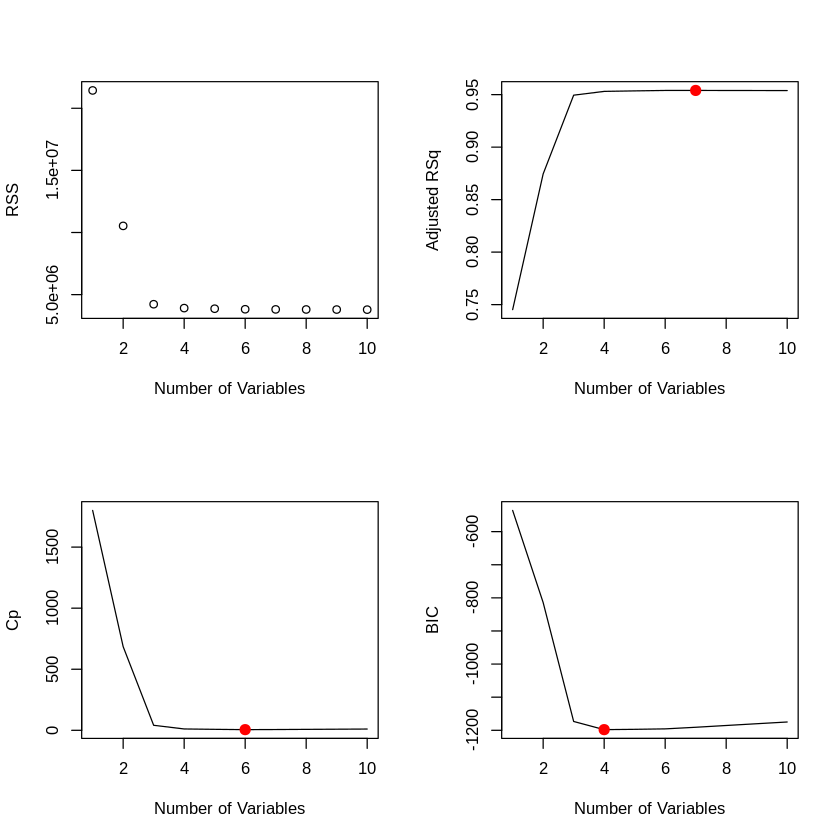

In [7]:
# Plot required elements
par(mfrow=c(2,2))
plot(reg_summary$rss, xlab="Number of Variables", ylab="RSS")

## Plot adjusted R2 vs Number of Variables
plot(reg_summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
## which_max() function is used to identify the location of the maximum point of a vector
(best_model = which.max(reg_summary$adjr2))
## Plot a red dot to indicate the model with the largest adjusted R2
points(best_model, reg_summary$adjr2[best_model], col="red", cex=2, pch=20)

## In a similar fashion, we can plot Cp and BIC
plot(reg_summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
(best_model = which.min(reg_summary$cp))
points(best_model, reg_summary$cp[best_model], col="red", cex=2, pch=20)

plot(reg_summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
(best_model = which.min(reg_summary$bic))
points(best_model, reg_summary$bic[best_model], col="red", cex=2, pch=20)

In the output, it is clear that the best models to select according to adjusted R-squared contain seven variables, using the Cp and AIC statistic, six variables, and finally, using the BIC, only four variables. The BIC generally places a heavier penalty on models with many variables, and hence results in the selection of smaller models than Cp or AIC.

Now use the `regsubsets()` function's built-in plot command to display the selected variables for the best model with a given number of predictors.

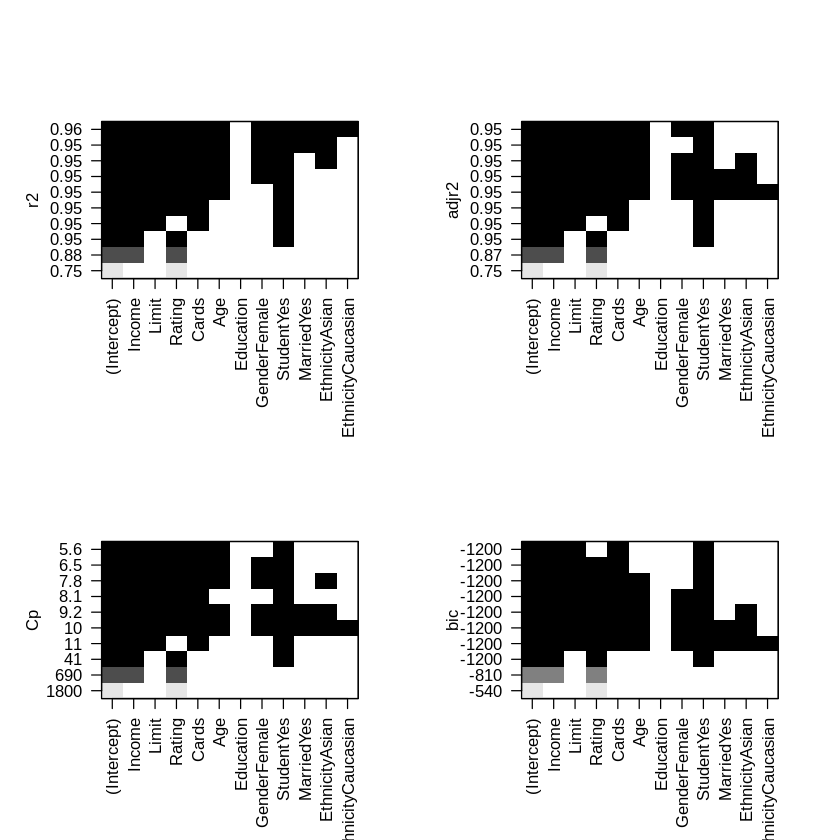

In [8]:
# Plot using regsubsets built-in plot function
par(mfrow=c(2,2))
plot(regfit_full, scale="r2")
plot(regfit_full, scale="adjr2")
plot(regfit_full, scale="Cp")
plot(regfit_full, scale="bic")

The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. For example, for BIC, choose a four-variable model. Now make use of the `coef()` function to see the coefficient estimates associated with this model.

In [10]:
# Print the coefficients
coef(regfit_full, id = 4)

(Intercept)       Income        Limit        Cards   StudentYes 
-499.7272117   -7.8392288    0.2666445   23.1753794  429.6064203

The next method of variable selection is forward and backward stepwise selection.

### Forward and backward stepwise selection

Forward stepwise selection is an iterative process whereby the most significant variables are added into the model. With backward stepwise selection, the model is chosen with all the variables as a starting point. The variable that leads to the largest RSS increment, meaning the least important, is removed. Then use the Cp, BIC, or adjusted R-squared value to select the optimal model.

Use the `regsubsets()` function to perform both forward and backward stepwise selection.

Subset selection object
Call: regsubsets.formula(Balance ~ ., data = credit, nvmax = 10, method = "forward")
11 Variables  (and intercept)
                   Forced in Forced out
Income                 FALSE      FALSE
Limit                  FALSE      FALSE
Rating                 FALSE      FALSE
Cards                  FALSE      FALSE
Age                    FALSE      FALSE
Education              FALSE      FALSE
GenderFemale           FALSE      FALSE
StudentYes             FALSE      FALSE
MarriedYes             FALSE      FALSE
EthnicityAsian         FALSE      FALSE
EthnicityCaucasian     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          Income Limit Rating Cards Age Education GenderFemale StudentYes
1  ( 1 )  " "    " "   "*"    " "   " " " "       " "          " "       
2  ( 1 )  "*"    " "   "*"    " "   " " " "       " "          " "       
3  ( 1 )  "*"    " "   "*"    " "   " " " "       " "          "*"       
4  ( 1 )  "*"    "*"   "

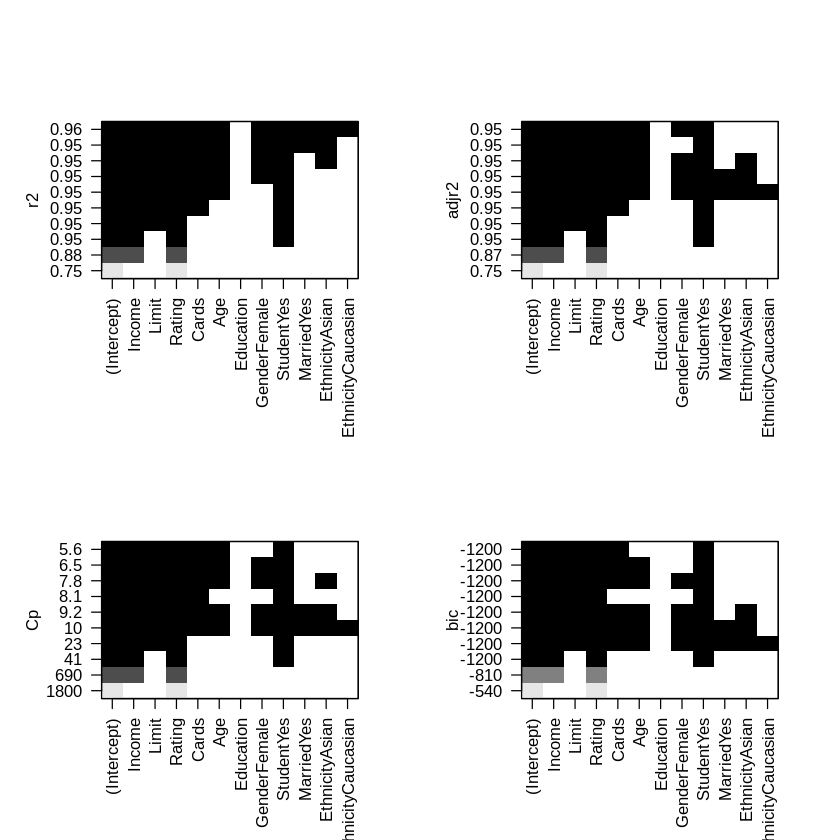

In [11]:
# Use regsubsets() to perform forward stepwise selection
regfit_fwd = regsubsets(Balance ~ .,
                        data = credit,
                        nvmax = 10,
                        method = "forward")
# Print the summary
summary(regfit_fwd)

# Plot the output
par(mfrow = c(2, 2))
plot(regfit_fwd, scale = "r2")
plot(regfit_fwd, scale = "adjr2")
plot(regfit_fwd, scale = "Cp")
plot(regfit_fwd, scale = "bic")

Subset selection object
Call: regsubsets.formula(Balance ~ ., data = credit, nvmax = 10, method = "backward")
11 Variables  (and intercept)
                   Forced in Forced out
Income                 FALSE      FALSE
Limit                  FALSE      FALSE
Rating                 FALSE      FALSE
Cards                  FALSE      FALSE
Age                    FALSE      FALSE
Education              FALSE      FALSE
GenderFemale           FALSE      FALSE
StudentYes             FALSE      FALSE
MarriedYes             FALSE      FALSE
EthnicityAsian         FALSE      FALSE
EthnicityCaucasian     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          Income Limit Rating Cards Age Education GenderFemale StudentYes
1  ( 1 )  " "    "*"   " "    " "   " " " "       " "          " "       
2  ( 1 )  "*"    "*"   " "    " "   " " " "       " "          " "       
3  ( 1 )  "*"    "*"   " "    " "   " " " "       " "          "*"       
4  ( 1 )  "*"    "*"  

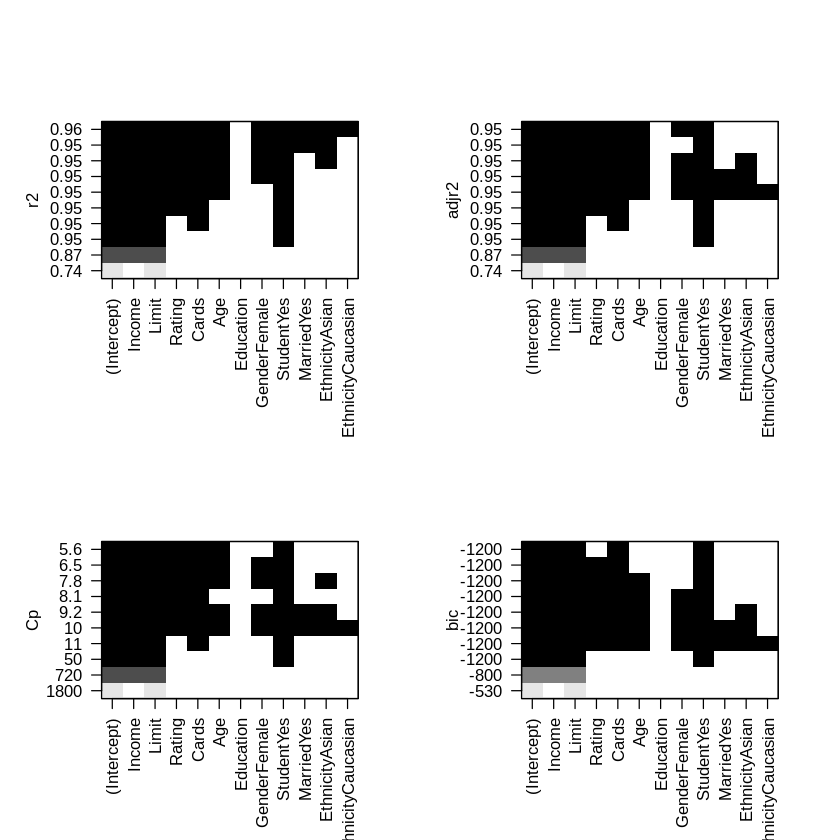

In [12]:
# Use regsubsets() to perform backward stepwise selection
regfit_bwd = regsubsets(Balance ~ .,
                        data = credit,
                        nvmax = 10,
                        method = "backward")

# Print the summary
summary(regfit_bwd)

# Plot the output
par(mfrow = c(2, 2))
plot(regfit_bwd, scale = "r2")
plot(regfit_bwd, scale = "adjr2")
plot(regfit_bwd, scale = "Cp")
plot(regfit_bwd, scale = "bic")

Using the adjusted R-squared value, observe that the two stepwise selection methods lead to the same selection of variables, including limit, income, student, cards, rating, age, and gender. These variables are the same as those selected by the best subset selection.

Finally, review the coefficient estimates associated with the models using different approaches. Print the output of seven for best subset selection, forward stepwise selection, and backward stepwise selection. These values would typically be used in predictions.

In [13]:
# Review coefficient outputs for our models
coef(regfit_full, 7)
coef(regfit_fwd, 7)
coef(regfit_bwd, 7)

(Intercept)       Income        Limit       Rating        Cards          Age 
-488.6158695   -7.8036338    0.1936237    1.0940490   18.1091708   -0.6206538 
GenderFemale   StudentYes 
 -10.4531521  426.5812620

(Intercept)       Income        Limit       Rating        Cards          Age 
-488.6158695   -7.8036338    0.1936237    1.0940490   18.1091708   -0.6206538 
GenderFemale   StudentYes 
 -10.4531521  426.5812620

(Intercept)       Income        Limit       Rating        Cards          Age 
-488.6158695   -7.8036338    0.1936237    1.0940490   18.1091708   -0.6206538 
GenderFemale   StudentYes 
 -10.4531521  426.5812620

All three methods result in the selection of the same variables and hence the same estimated coefficients under the least squares fit.